#Practical Part - 2 Answers


###1. Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results.

In [15]:
from scipy.stats import norm
import numpy as np

sample = np.random.normal(loc=105, scale=10, size=30)
pop_mean = 100
sample_mean = np.mean(sample)
std = np.std(sample, ddof=1)
z = (sample_mean - pop_mean) / (std / np.sqrt(len(sample)))
p = 2 * (1 - norm.cdf(abs(z)))

print("Z-score:", z)
print("P-value:", p)


Z-score: 2.0788616869684273
P-value: 0.037630065069983454


###2. Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python.

In [16]:
np.random.seed(0)
data = np.random.normal(50, 10, 100)
z = (np.mean(data) - 55) / (np.std(data, ddof=1) / np.sqrt(len(data)))
p = 1 - norm.cdf(z)

print("Z =", z)
print("P-value =", p)


Z = -4.345601847380337
P-value = 0.9999930552846384


###3.  Implement a one-sample Z-test using Python to compare the sample mean with the population mean.

In [17]:
def one_sample_z_test(data, pop_mean):
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    z = (mean - pop_mean) / (std / np.sqrt(len(data)))
    p = 2 * (1 - norm.cdf(abs(z)))
    return z, p

data = np.random.normal(100, 10, 50)
z, p = one_sample_z_test(data, 105)
print("Z-score:", z, "P-value:", p)


Z-score: -1.6511668595726001 P-value: 0.09870450810759834


###4.  Perform a two-tailed Z-test using Python and visualize the decision region on a plot.

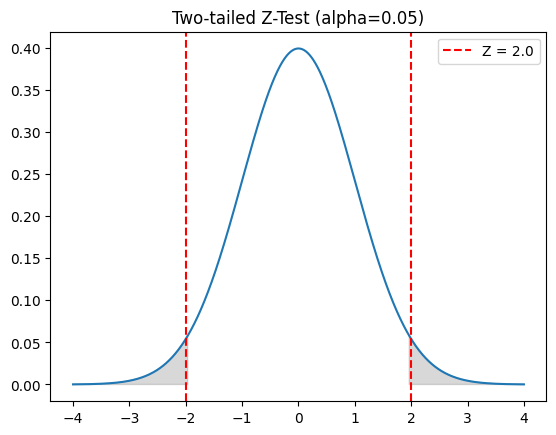

In [18]:
import matplotlib.pyplot as plt

z_val = 2.0
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

plt.plot(x, y)
plt.axvline(x=z_val, color='red', linestyle='--', label='Z = 2.0')
plt.axvline(x=-z_val, color='red', linestyle='--')
plt.title("Two-tailed Z-Test (alpha=0.05)")
plt.fill_between(x, y, where=(x <= -1.96) | (x >= 1.96), color='gray', alpha=0.3)
plt.legend()
plt.show()


###5. Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing.

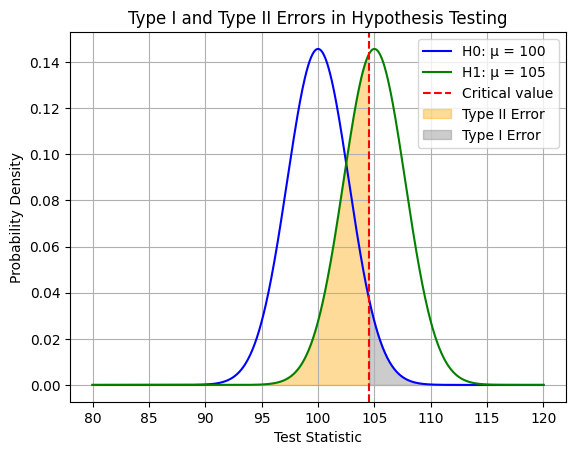

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def visualize_errors(mu0=100, mu1=105, std=15, n=30, alpha=0.05):
    x = np.linspace(80, 120, 1000)
    se = std / np.sqrt(n)
    crit_val = norm.ppf(1 - alpha)

    plt.plot(x, norm.pdf(x, mu0, se), label="H0: μ = 100", color='blue')
    plt.plot(x, norm.pdf(x, mu1, se), label="H1: μ = 105", color='green')

    critical_x = mu0 + crit_val * se
    plt.axvline(critical_x, color='red', linestyle='--', label='Critical value')

    plt.fill_between(x, 0, norm.pdf(x, mu1, se), where=(x < critical_x), color='orange', alpha=0.4, label='Type II Error')
    plt.fill_between(x, 0, norm.pdf(x, mu0, se), where=(x > critical_x), color='gray', alpha=0.4, label='Type I Error')

    plt.title("Type I and Type II Errors in Hypothesis Testing")
    plt.xlabel("Test Statistic")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)
    plt.show()

# ✅ Call the function to display output
visualize_errors()


###6.  Write a Python program to perform an independent T-test and interpret the results.

In [20]:
from scipy.stats import ttest_ind

group1 = np.random.normal(50, 5, 30)
group2 = np.random.normal(55, 5, 30)
t_stat, p_val = ttest_ind(group1, group2)

print("T-statistic:", t_stat)
print("P-value:", p_val)


T-statistic: -3.802524533504993
P-value: 0.000346447599494531


###7. Perform a paired sample T-test using Python and visualize the comparison results.

In [21]:
from scipy.stats import ttest_rel

before = np.random.normal(100, 10, 20)
after = before + np.random.normal(-2, 5, 20)
t_stat, p_val = ttest_rel(before, after)

print("Paired T-statistic:", t_stat)
print("P-value:", p_val)


Paired T-statistic: 2.972814121461579
P-value: 0.007817997252564829


###8. Simulate data and perform both Z-test and T-test, then compare the results using Python.

In [22]:
from scipy.stats import ttest_1samp

data = np.random.normal(102, 10, 30)
z_stat = (np.mean(data) - 100) / (np.std(data, ddof=1) / np.sqrt(len(data)))
z_p = 2 * (1 - norm.cdf(abs(z_stat)))
t_stat, t_p = ttest_1samp(data, 100)

print(f"Z-test: z = {z_stat:.2f}, p = {z_p:.4f}")
print(f"T-test: t = {t_stat:.2f}, p = {t_p:.4f}")


Z-test: z = -0.05, p = 0.9617
T-test: t = -0.05, p = 0.9621


###9. Write a Python function to calculate the confidence interval for a sample mean and explain its significance.

In [23]:
import numpy as np
from scipy import stats

def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    se = stats.sem(data)  # Standard error of the mean
    margin = se * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean - margin, mean + margin, mean

# Sample data (e.g., test scores or measurements)
np.random.seed(0)
sample_data = np.random.normal(loc=100, scale=15, size=30)

# Compute confidence interval
ci_lower, ci_upper, sample_mean = confidence_interval(sample_data)

# Output
print(f"Sample Mean = {sample_mean:.2f}")
print(f"95% Confidence Interval = ({ci_lower:.2f}, {ci_upper:.2f})")


Sample Mean = 106.64
95% Confidence Interval = (100.48, 112.81)


###10. Write a Python program to calculate the margin of error for a given confidence level using sample data.

In [24]:
data = np.random.normal(50, 5, 30)
se = stats.sem(data)
z_critical = norm.ppf(0.975)  # 95% confidence
moe = z_critical * se
print("Margin of Error:", moe)


Margin of Error: 1.6357501855241674


###11. Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process.

In [25]:
# P(A|B) = (P(B|A) * P(A)) / P(B)
def bayes_theorem(p_a, p_b_given_a, p_b):
    return (p_b_given_a * p_a) / p_b

posterior = bayes_theorem(0.01, 0.99, 0.05)
print("Posterior Probability:", posterior)


Posterior Probability: 0.198


###12. Perform a Chi-square test for independence between two categorical variables in Python.

In [26]:
import pandas as pd
from scipy.stats import chi2_contingency

data = [[10, 20], [20, 30]]
chi2, p, dof, expected = chi2_contingency(data)

print("Chi-square statistic:", chi2)
print("P-value:", p)


Chi-square statistic: 0.128
P-value: 0.7205147871362552


###13. Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data.

In [27]:
observed = [50, 30, 20]
total = sum(observed)
expected = [total / len(observed)] * len(observed)
print("Expected Frequencies:", expected)


Expected Frequencies: [33.333333333333336, 33.333333333333336, 33.333333333333336]


###14. Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution.

In [28]:
from scipy.stats import chisquare

observed = [50, 30, 20]
expected = [40, 35, 25]
chi2, p_val = chisquare(f_obs=observed, f_exp=expected)

print("Chi-square:", chi2)
print("P-value:", p_val)


Chi-square: 4.214285714285714
P-value: 0.12158485594365533
